<a href="https://colab.research.google.com/github/MariuszGrecki/Machine_learning_tutorial/blob/main/classification/07_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

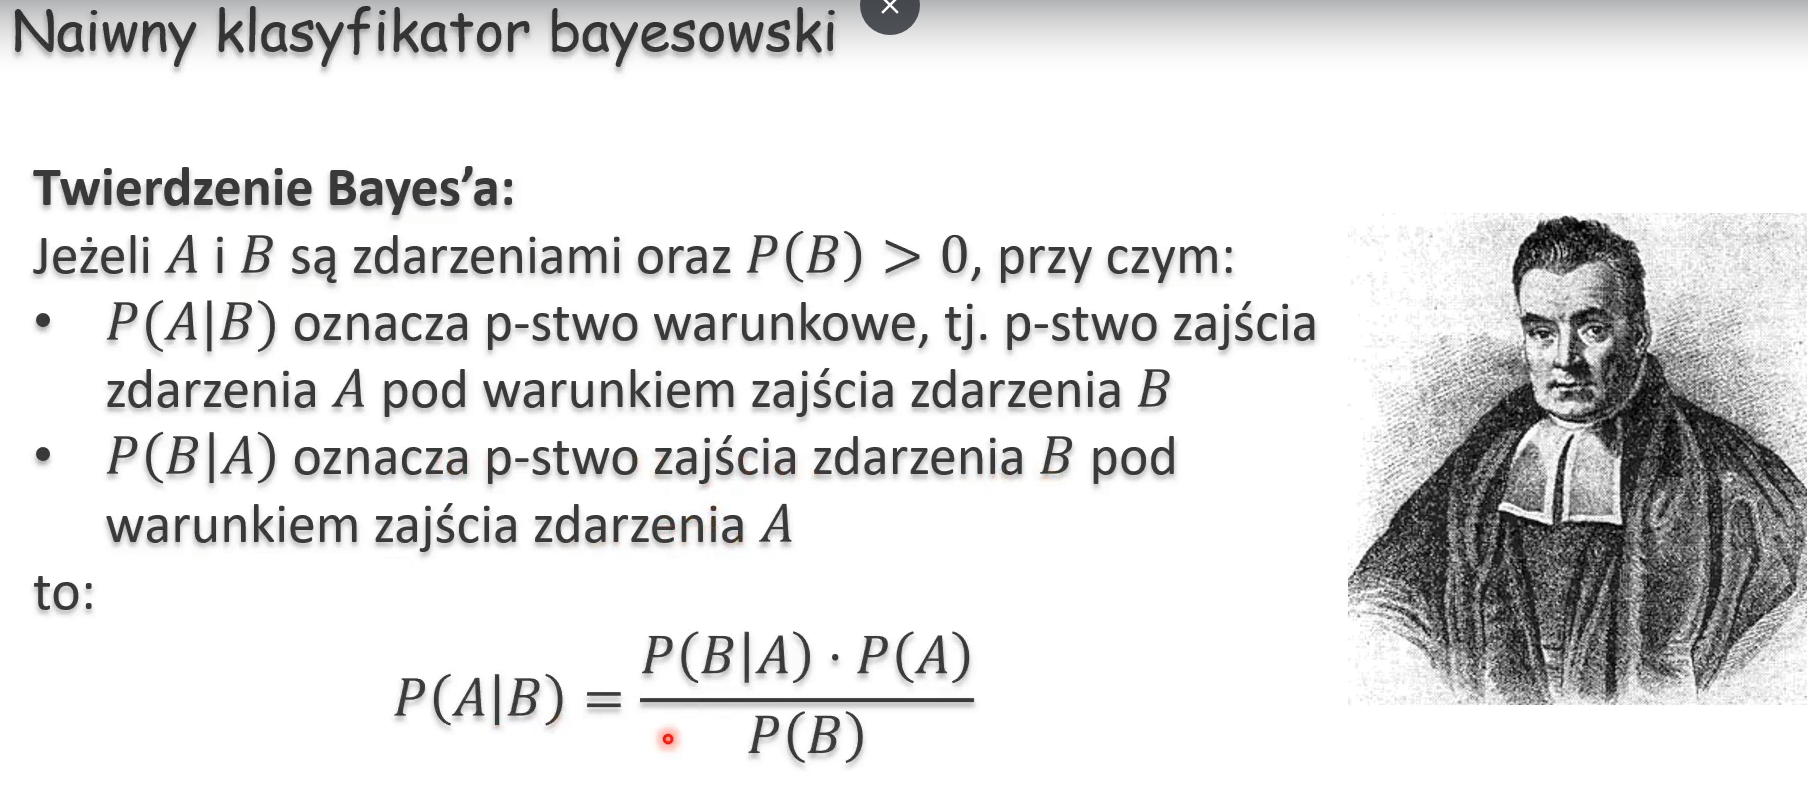

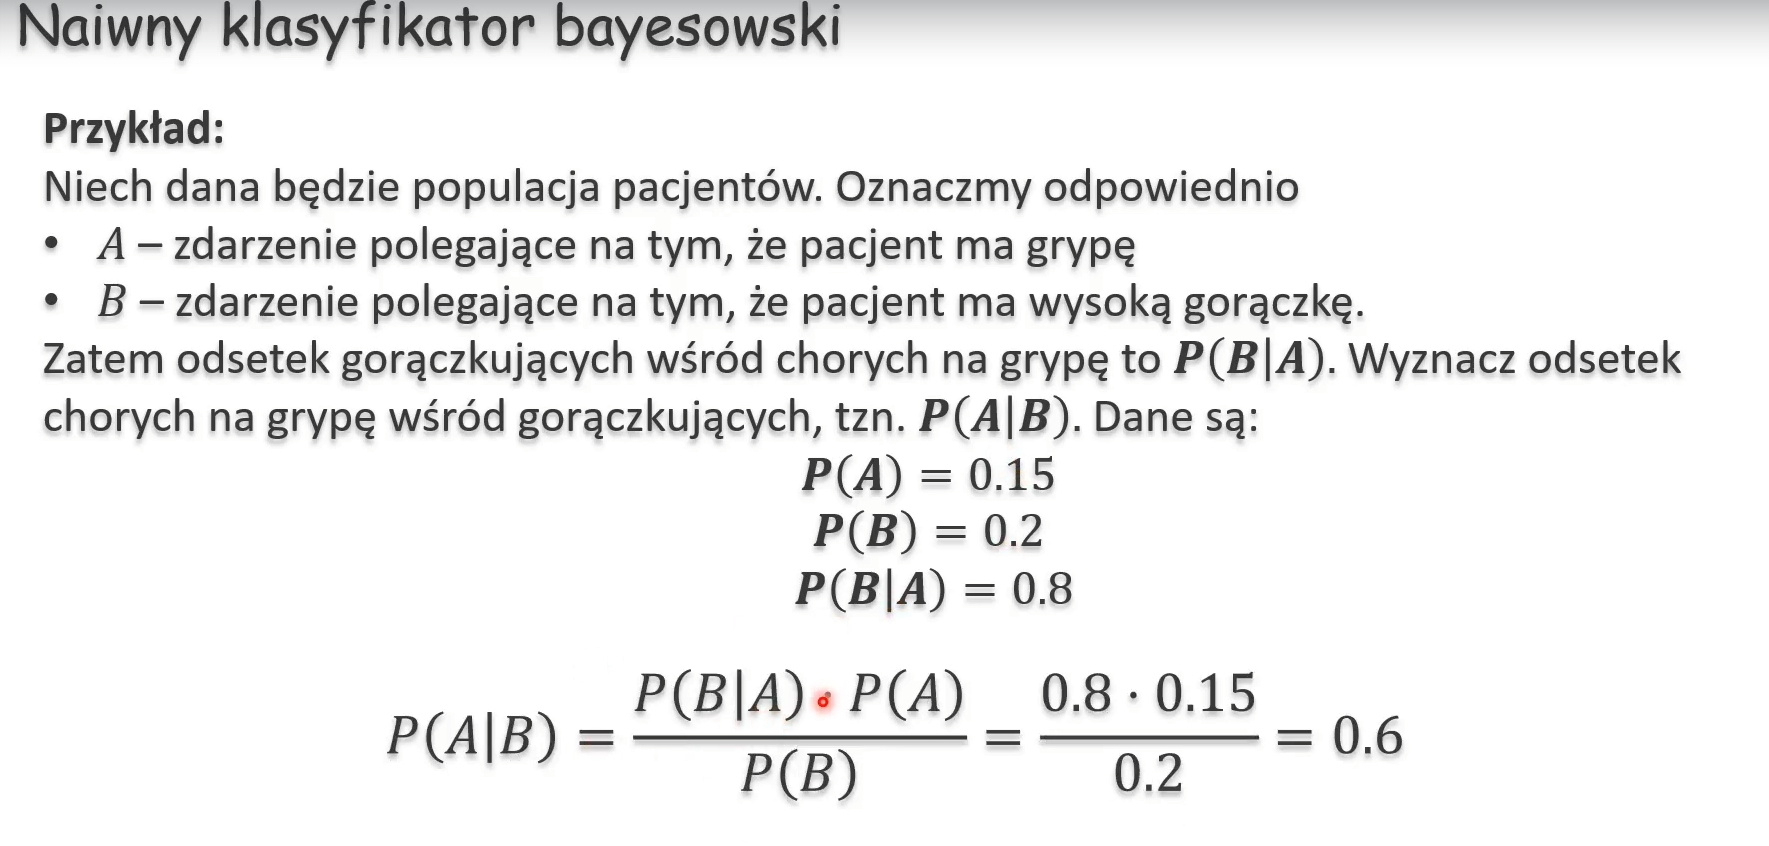

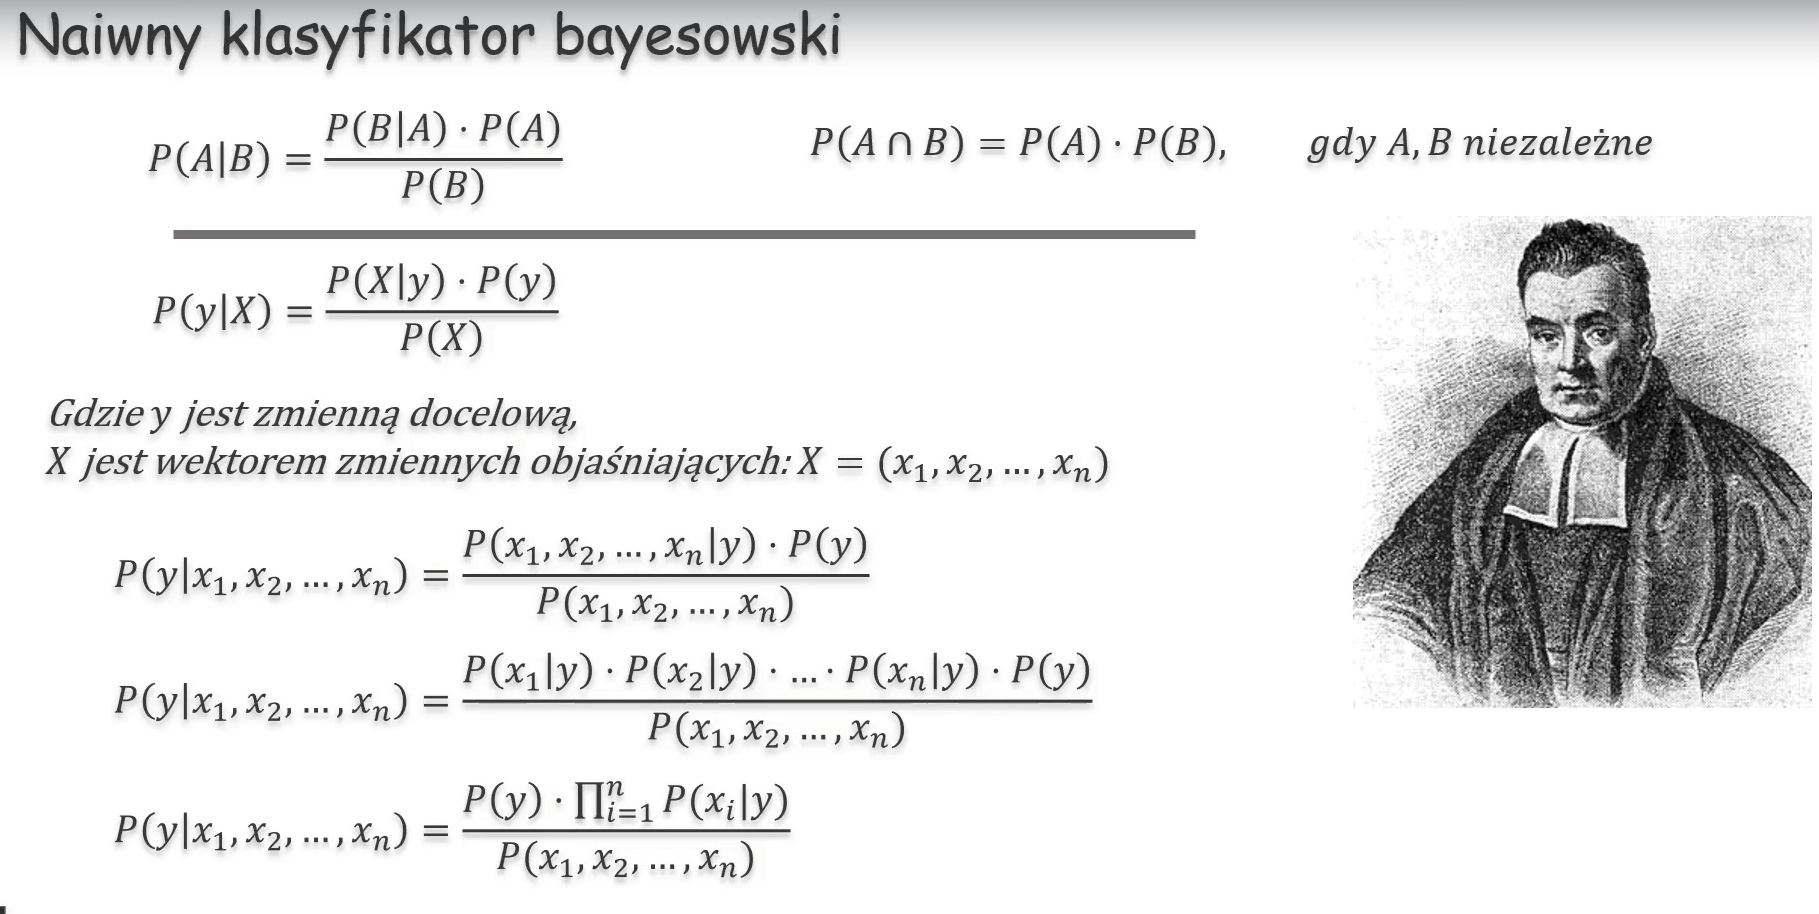

# Wyjśc na spacer czy zostać w domu??

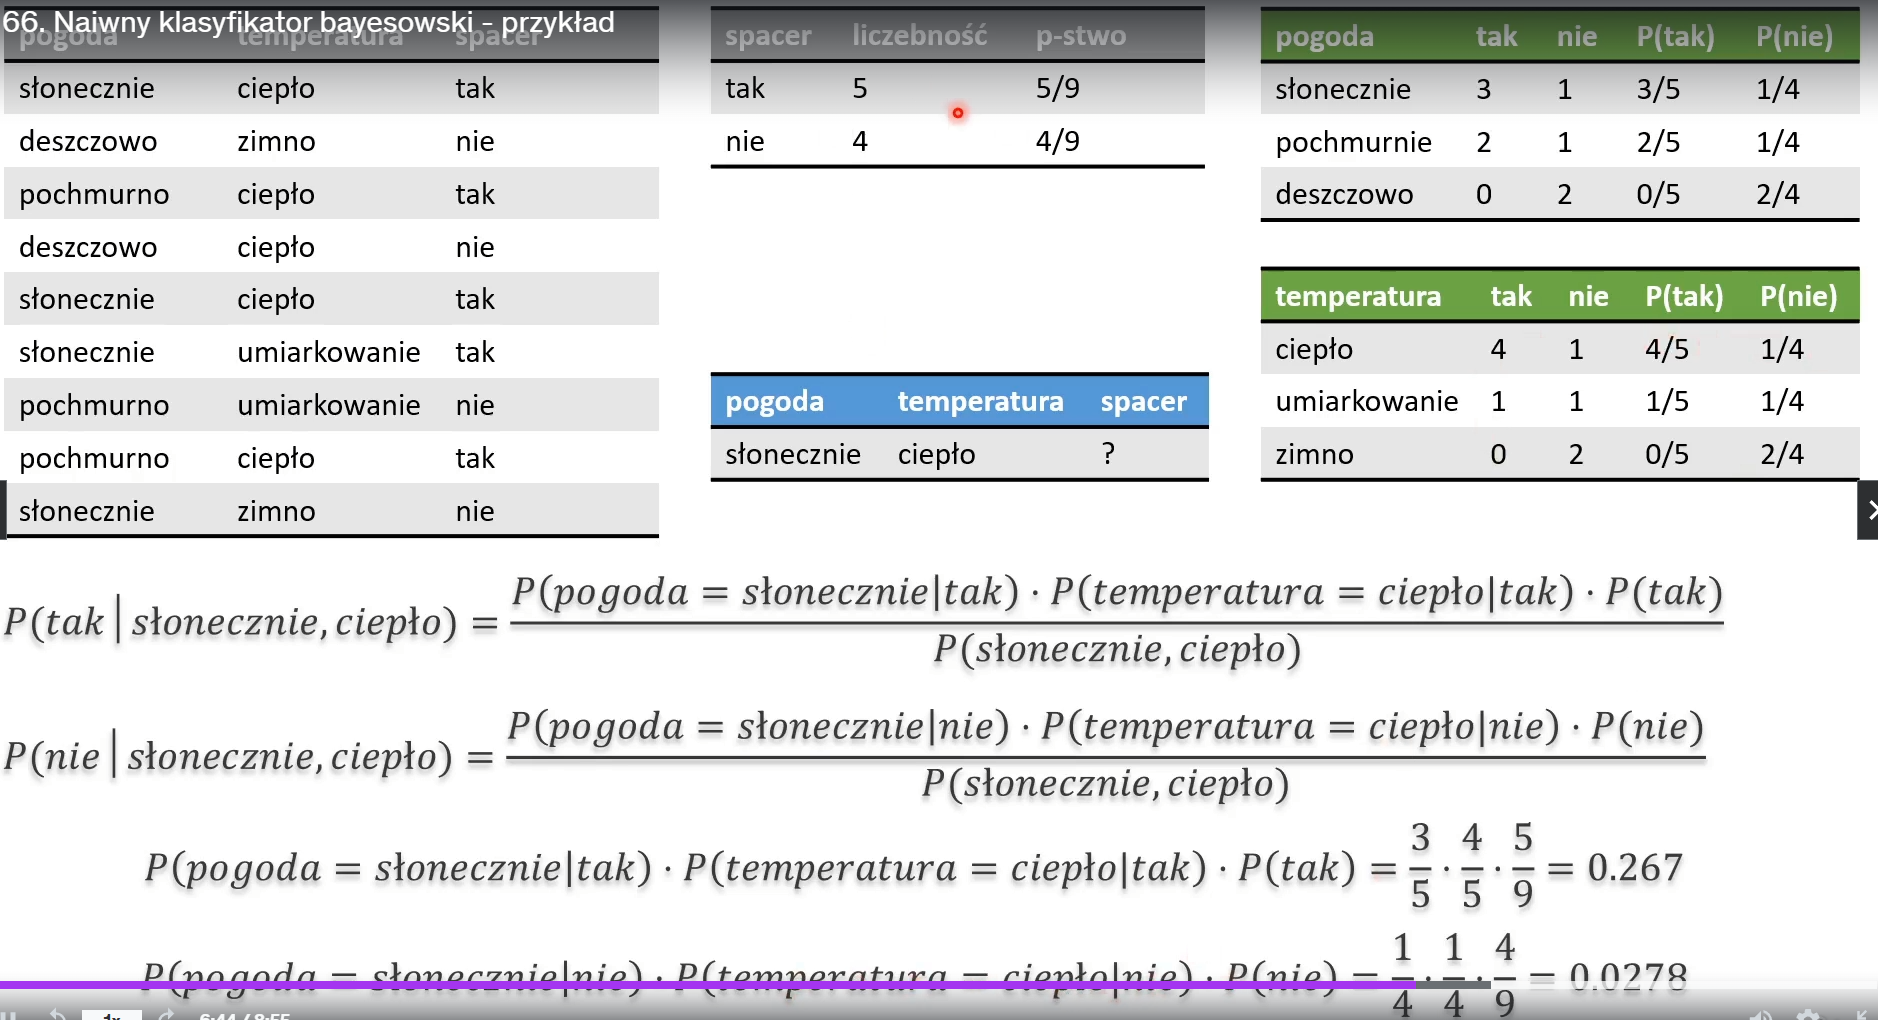

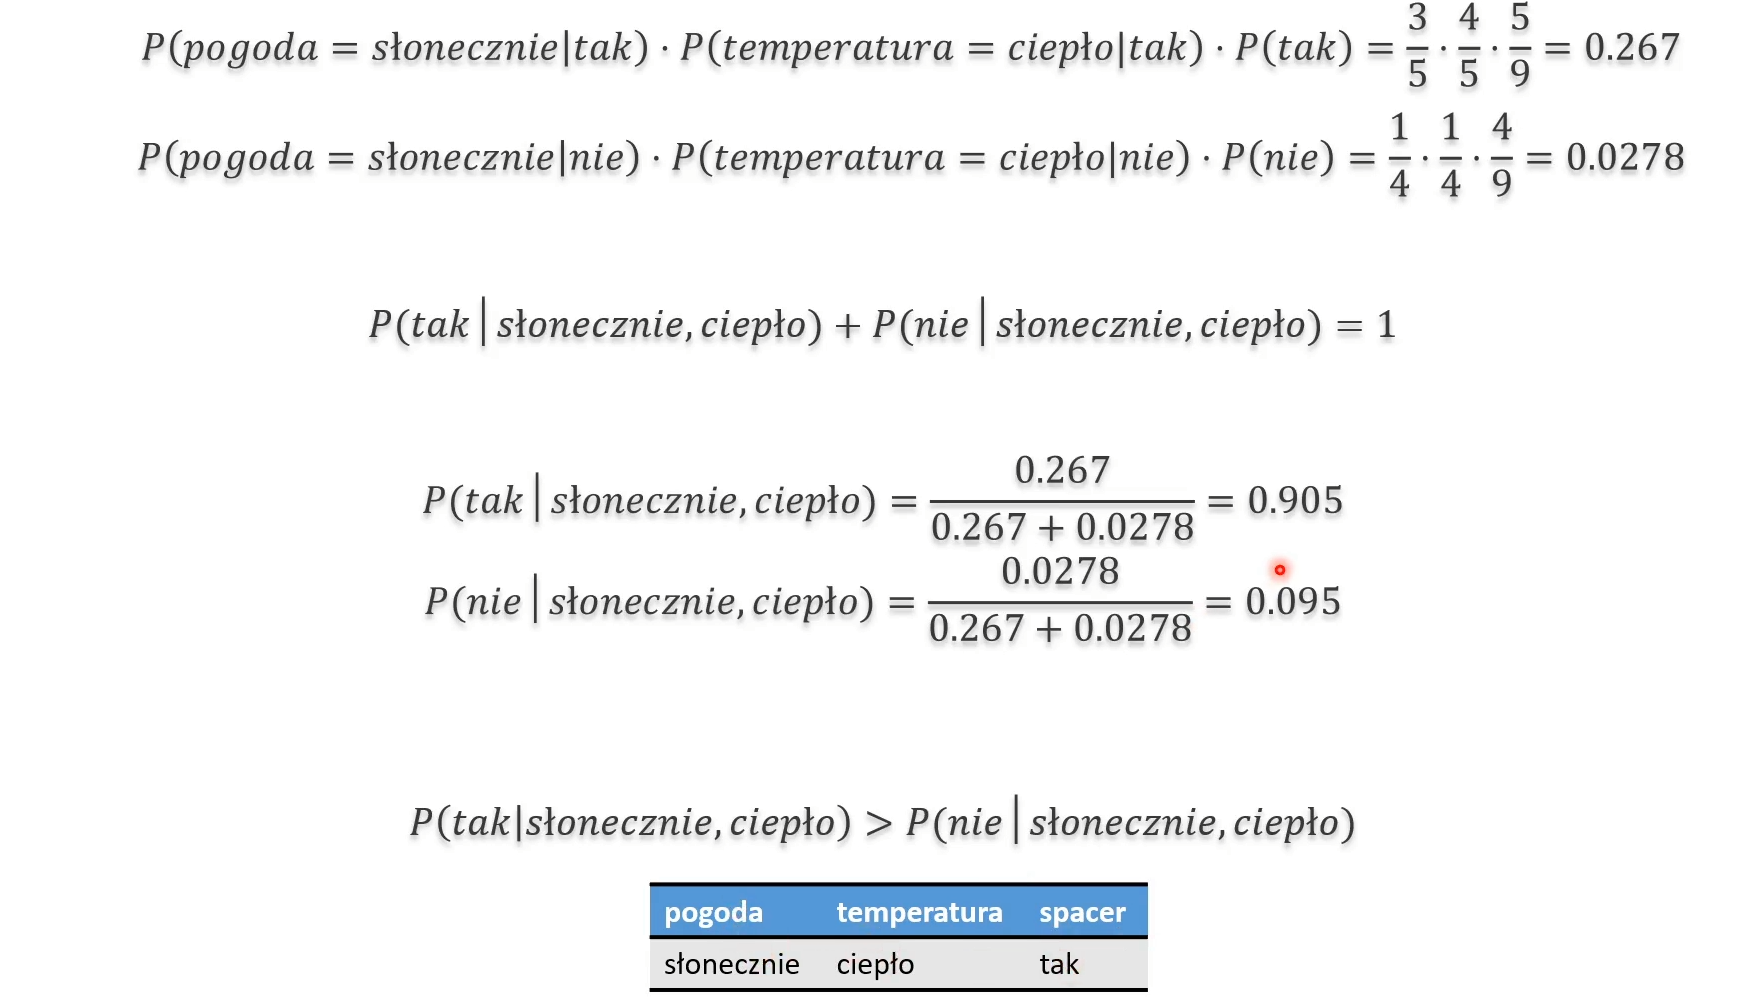

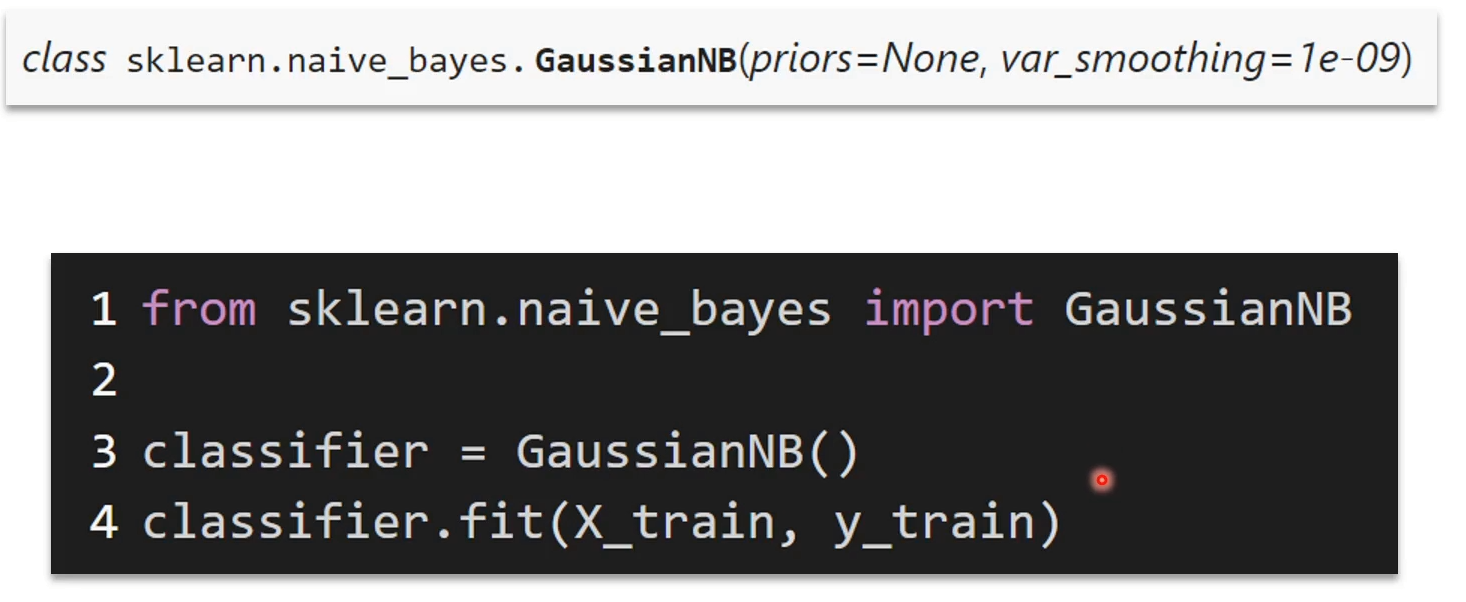

In [7]:
import numpy as np
import pandas as pd
import sklearn

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sklearn.__version__

'1.2.2'

In [12]:
pogoda = ['słonecznie', 'deszczowo', 'pochmurno', 'deszczowo', 'słonecznie', 'słonecznie', 'pochmurno', 'pochmurno', 'słonecznie']
temperatura = ['ciepło', 'zimno', 'ciepło', 'ciepło', 'ciepło', 'umiarkowanie', 'umiarkowanie', 'ciepło', 'zimno']
spacer = ['tak', 'nie', 'tak', 'nie', 'tak', 'tak', 'nie', 'tak', 'nie']

raw_df = pd.DataFrame(data={'pogoda': pogoda, 'temperatura': temperatura, 'spacer': spacer})
df = raw_df.copy()
df

pogoda   temperatura spacer
0  słonecznie        ciepło    tak
1   deszczowo         zimno    nie
2   pochmurno        ciepło    tak
3   deszczowo        ciepło    nie
4  słonecznie        ciepło    tak
5  słonecznie  umiarkowanie    tak
6   pochmurno  umiarkowanie    nie
7   pochmurno        ciepło    tak
8  słonecznie         zimno    nie

In [13]:
#przygotowanie danych do modelu
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['spacer'] = encoder.fit_transform(spacer)
df

pogoda   temperatura  spacer
0  słonecznie        ciepło       1
1   deszczowo         zimno       0
2   pochmurno        ciepło       1
3   deszczowo        ciepło       0
4  słonecznie        ciepło       1
5  słonecznie  umiarkowanie       1
6   pochmurno  umiarkowanie       0
7   pochmurno        ciepło       1
8  słonecznie         zimno       0

In [14]:
df = pd.get_dummies(df, columns=['pogoda', 'temperatura'], dtype=int, drop_first=True)
df

spacer  pogoda_pochmurno  pogoda_słonecznie  temperatura_umiarkowanie  \
0       1                 0                  1                         0   
1       0                 0                  0                         0   
2       1                 1                  0                         0   
3       0                 0                  0                         0   
4       1                 0                  1                         0   
5       1                 0                  1                         1   
6       0                 1                  0                         1   
7       1                 1                  0                         0   
8       0                 0                  1                         0   

   temperatura_zimno  
0                  0  
1                  1  
2                  0  
3                  0  
4                  0  
5                  0  
6                  0  
7                  0  
8                  1

In [15]:
data = df.copy()
target = data.pop('spacer')

data

pogoda_pochmurno  pogoda_słonecznie  temperatura_umiarkowanie  \
0                 0                  1                         0   
1                 0                  0                         0   
2                 1                  0                         0   
3                 0                  0                         0   
4                 0                  1                         0   
5                 0                  1                         1   
6                 1                  0                         1   
7                 1                  0                         0   
8                 0                  1                         0   

   temperatura_zimno  
0                  0  
1                  1  
2                  0  
3                  0  
4                  0  
5                  0  
6                  0  
7                  0  
8                  1

In [16]:
target

0    1
1    0
2    1
3    0
4    1
5    1
6    0
7    1
8    0
Name: spacer, dtype: int64

# Klasyfikator bayesowski

In [17]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(data, target)

GaussianNB()

In [18]:
model.score(data, target)

0.7777777777777778

In [19]:
#wycinanie pierwsego wiersza
data.iloc[[0]]

pogoda_pochmurno  pogoda_słonecznie  temperatura_umiarkowanie  \
0                 0                  1                         0   

   temperatura_zimno  
0                  0

In [20]:
model.predict(data.iloc[[0]])

array([1])

In [21]:
encoder.classes_

array(['nie', 'tak'], dtype='<U3')

In [22]:
encoder.classes_[model.predict(data.iloc[[0]])[0]]

'tak'

In [23]:
model.predict_proba(data.iloc[[0]])

array([[0.000006, 0.999994]])